<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>GRU - Bike Demand Prediction</b></p>

<div style="text-align: center;">
    <img src="https://user-images.githubusercontent.com/56977388/225399794-b598b9c3-893c-4b13-ae2c-9d6d0e886994.png" width="800" height="550"/>
</div>

# <font color='steelblue'> <b>Importing Libraries </b><font color='black'>  

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# <font color='steelblue'> <b>Loading The Dataset</b><font color='black'>  

**About Dataset**

**Features**

- **timestamp**: timestamp field for grouping the data
- **cnt**: the count of a new bike shares
- **t1**: real temperature in C
- **t2**: temperature in C “feels like”
- **hum**: humidity in percentage
- **wind_speed**: wind speed in km/h
- **weather_code**: category of the weather
- **is_holiday**: boolean field - 1 holiday / 0 non holiday
- **is_weekend**: boolean field - 1 if the day is weekend
- **season**: category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*

In [8]:
df = pd.read_csv("store_sharing.csv", parse_dates=['timestamp'], index_col="timestamp")

In [9]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000


In [10]:
df.tail()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2017-01-03 19:00:00,1042,5.000,1.000,81.000,19.000,3.000,0.000,0.000,3.000
2017-01-03 20:00:00,541,5.000,1.000,81.000,21.000,4.000,0.000,0.000,3.000
2017-01-03 21:00:00,337,5.500,1.500,78.500,24.000,4.000,0.000,0.000,3.000
2017-01-03 22:00:00,224,5.500,1.500,76.000,23.000,4.000,0.000,0.000,3.000
2017-01-03 23:00:00,139,5.000,1.000,76.000,22.000,2.000,0.000,0.000,3.000


# <font color='steelblue'> <b>Understanding The Data & EDA</b><font color='black'>  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


We can see that all the data is a numerical value and there is no null data.

**EDA**

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

## <font color='skyblue'> <b>Check Missing Values and Outliers</b><font color='black'>  

In [16]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.000,1143.102,1085.108,0.000,257.000,844.000,1671.750,7860.000
t1,17414.000,12.468,5.572,-1.500,8.000,12.500,16.000,34.000
t2,17414.000,11.521,6.615,-6.000,6.000,12.500,16.000,34.000
hum,17414.000,72.325,14.313,20.500,63.000,74.500,83.000,100.000
wind_speed,17414.000,15.913,7.895,0.000,10.000,15.000,20.500,56.500
weather_code,17414.000,2.723,2.341,1.000,1.000,2.000,3.000,26.000
is_holiday,17414.000,0.022,0.147,0.000,0.000,0.000,0.000,1.000
is_weekend,17414.000,0.285,0.452,0.000,0.000,0.000,1.000,1.000
season,17414.000,1.492,1.119,0.000,0.000,1.000,2.000,3.000


## <font color='skyblue'> <b>Plot Breakdowns of Data</b><font color='black'>  

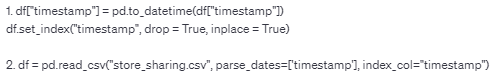

Since we assigned our data to the index, we can extract different features from it. If it had not been assigned to the index, we could have used the "to_datetime" function to extract the desired features. We performed this operation on the Date column to facilitate the analysis.

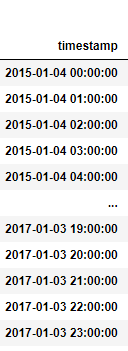

In [22]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour 
df["date"] = df.index.date

We see that new features are added to the end of df.

In [24]:
df.sample(7)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,dayofweek,hour,date
timestamp,,,,,,,,,,,,,,,
2016-04-09 17:00:00,1672,10.000,7.500,64.500,17.500,7.000,0.000,1.000,0.000,2016,4,9,5,17,2016-04-09
2016-01-03 06:00:00,48,7.000,5.500,71.000,9.000,1.000,0.000,1.000,3.000,2016,1,3,6,6,2016-01-03
2015-11-07 15:00:00,1111,17.000,17.000,85.500,28.000,7.000,0.000,1.000,2.000,2015,11,7,5,15,2015-11-07
2015-09-06 21:00:00,688,17.000,17.000,59.000,8.000,1.000,0.000,1.000,2.000,2015,9,6,6,21,2015-09-06
2015-05-09 02:00:00,287,13.500,13.500,79.500,22.000,3.000,0.000,1.000,0.000,2015,5,9,5,2,2015-05-09
2015-11-08 19:00:00,740,16.500,16.500,85.500,25.000,7.000,0.000,1.000,2.000,2015,11,8,6,19,2015-11-08
2016-02-09 16:00:00,1349,7.000,3.000,53.000,23.000,2.000,0.000,0.000,3.000,2016,2,9,1,16,2016-02-09


To make the seasons more explicit, we converted them to strings and added them to the end of the dataframe so that we can clearly see what these numbers represent. 

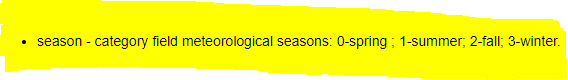

In [27]:
df['season_name'] = df['season'].replace({0:"Spring", 1:"Summer", 2:"Autumn", 3:"Winter"})

In [28]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,dayofweek,hour,date,season_name
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,2015,1,4,6,0,2015-01-04,Winter
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,2015,1,4,6,1,2015-01-04,Winter
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,2015,1,4,6,2,2015-01-04,Winter
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,2015,1,4,6,3,2015-01-04,Winter
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,2015,1,4,6,4,2015-01-04,Winter


***i. Plot bike shares over time***

This code creates a line plot of the `cnt` variable (count) over time in the `df` dataframe. The figure size is determined by the `figsize` parameter (15 units wide, 5 units high). The `sns.lineplot()` function represents the data as a line plot by placing time on the x-axis and `cnt` values on the y-axis.

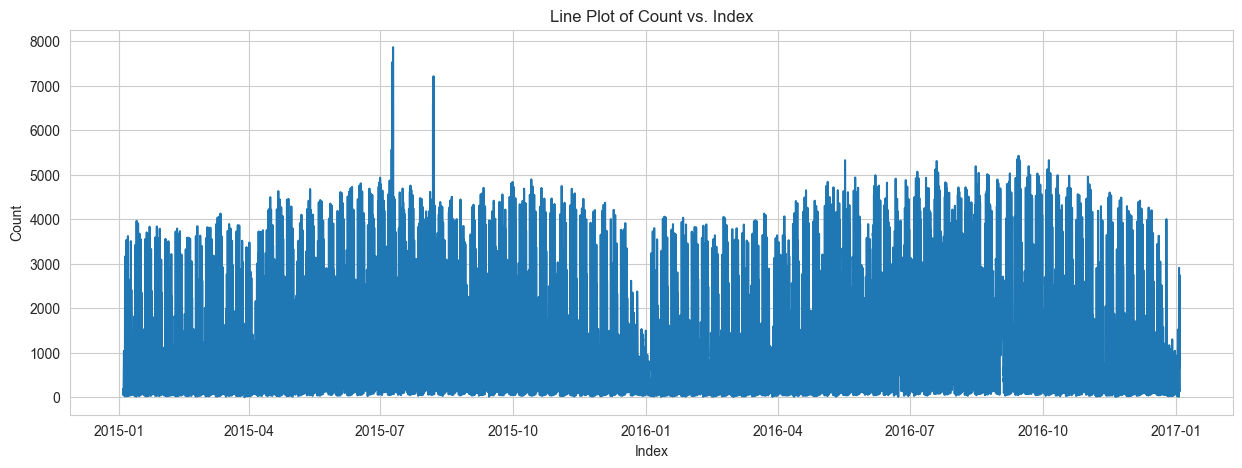

In [31]:
plt.figure(figsize=(15, 5))  # Set the figure size
sns.lineplot(x=df.index, y="cnt", data=df)  # Plot using Seaborn's lineplot function

plt.xlabel("Index")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label
plt.title("Line Plot of Count vs. Index")  # Set the plot title
plt.show()  # Display the plot

This code groups the `df` dataframe by the `date` column and calculates the total daily `cnt` (count) values. As a result, we obtain the `date_cnt` series, which contains the total usage count for each date. Then, the command `plt.figure(figsize=(15,5))` sets the figure size (15 units wide, 5 units high). The `sns.lineplot()` function places dates on the x-axis and total usage counts on the y-axis, creating a line plot that shows daily usage over time. This allows us to visualize the variation in daily usage over time.  

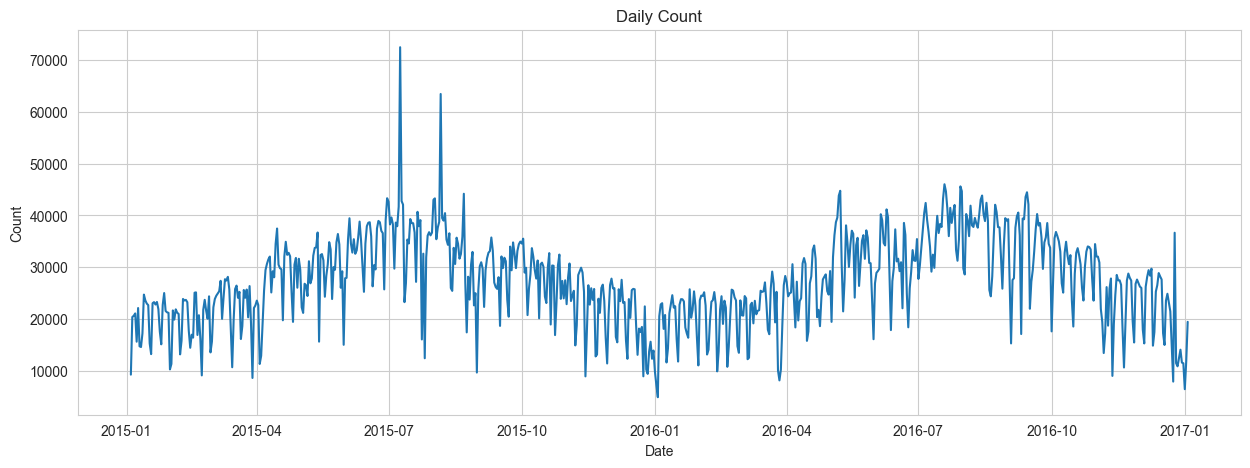

In [33]:
date_cnt = df.groupby("date")["cnt"].sum()   # Diary use with groupby to simplify the visual

plt.figure(figsize=(15, 5))
sns.lineplot(x=date_cnt.index, y=date_cnt.values)

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Daily Count")
plt.show()

***ii. Plot bike shares by months***

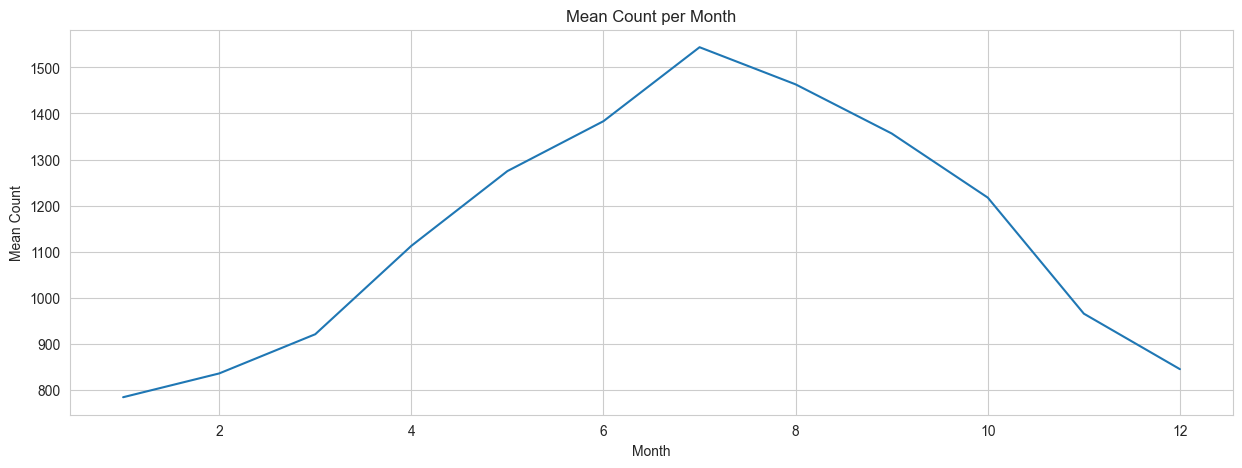

In [35]:
month_cnt = df.groupby("month")["cnt"].mean()

plt.figure(figsize=(15, 5))
sns.lineplot(x=month_cnt.index, y=month_cnt.values)

plt.xlabel("Month")
plt.ylabel("Mean Count")
plt.title("Mean Count per Month")

plt.show()

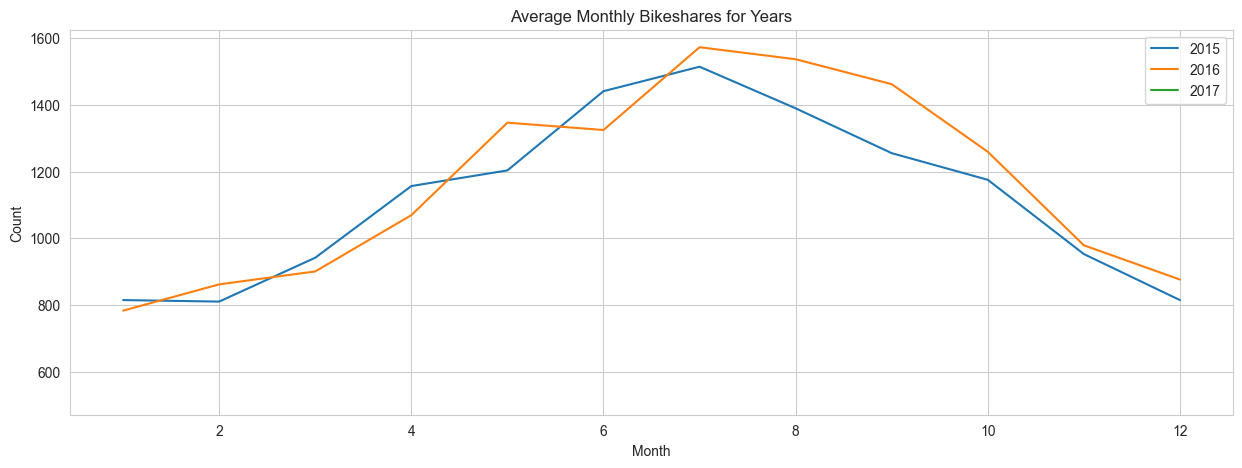

In [36]:
year_month_cnt = df.groupby(["year", "month"])["cnt"].mean()

plt.figure(figsize=(15,5))        # Since there is very little data in 2017, we cannot see it here.
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

The command `groupby(["year", "month"])` groups the dataframe by years and months and calculates the mean (`mean()`) of the `cnt` (count) column. In this way, we obtain the average usage value for each month of each year. A new dataframe named `year_month_cnt` is created to store these values.  

Then, `plt.figure(figsize=(15,5))` sets the figure size. The loop `for year in year_month_cnt.index.levels[0]:` iterates through each year, and the command `plt.plot(year_month_cnt[year].index, year_month_cnt[year], label=year)` plots a line graph for each year, displaying the average usage for each month. This allows us to visualize the changes in monthly usage over the years and compare different years.  

In summary, we group the data by years and months, calculate the average usage for each month of each year, and visualize it with a line plot. This helps analyze usage trends across years and months and enables year-to-year comparisons.  

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

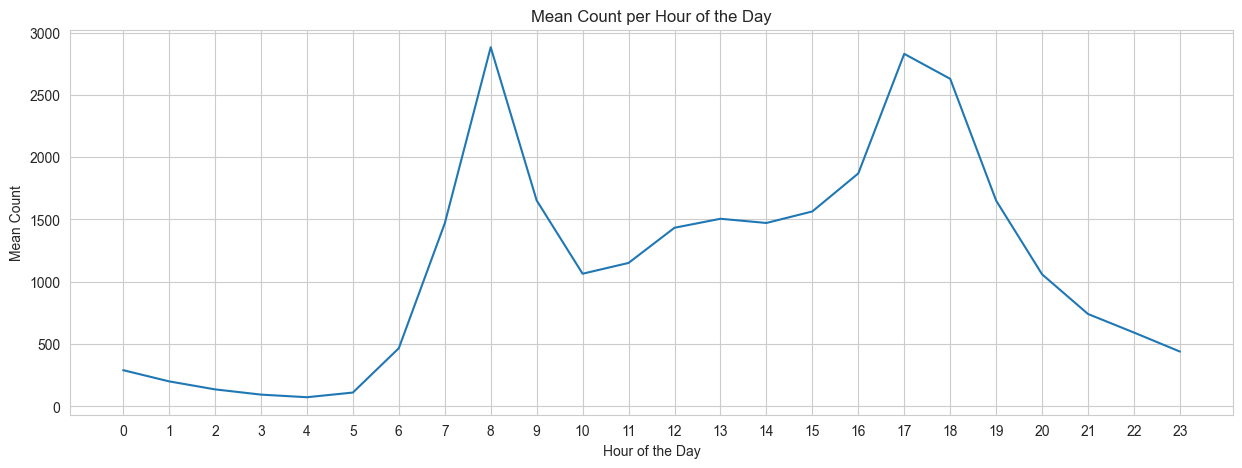

In [39]:
hour_cnt = df.groupby("hour")["cnt"].mean()

plt.figure(figsize=(15, 5))
plt.xticks(np.arange(24))
sns.lineplot(x=hour_cnt.index, y=hour_cnt.values)

plt.xlabel("Hour of the Day")
plt.ylabel("Mean Count")
plt.title("Mean Count per Hour of the Day")

plt.show()

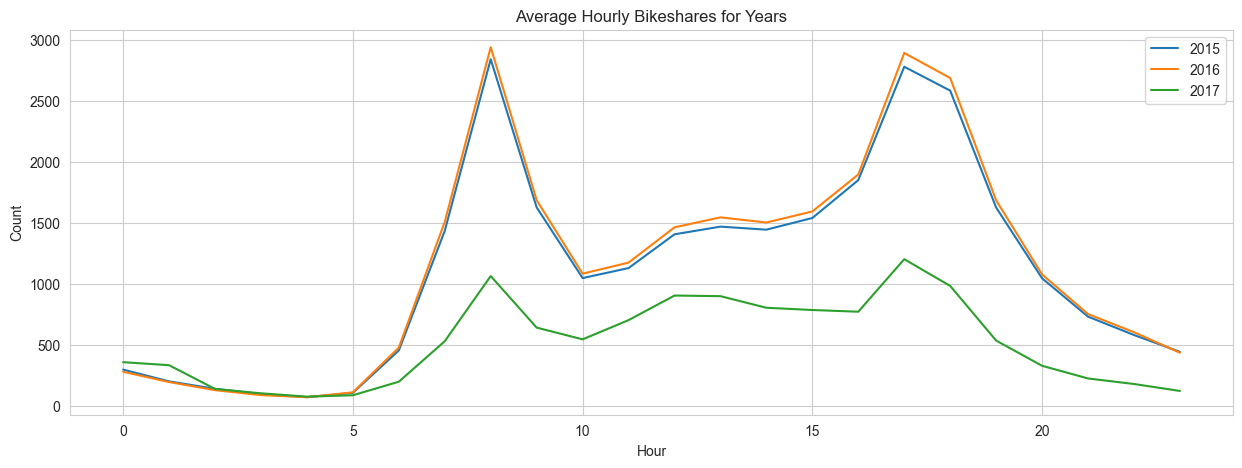

In [40]:
year_hour_cnt = df.groupby(["year", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_hour_cnt[year].index, year_hour_cnt[year],label=year)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Years')
plt.show()

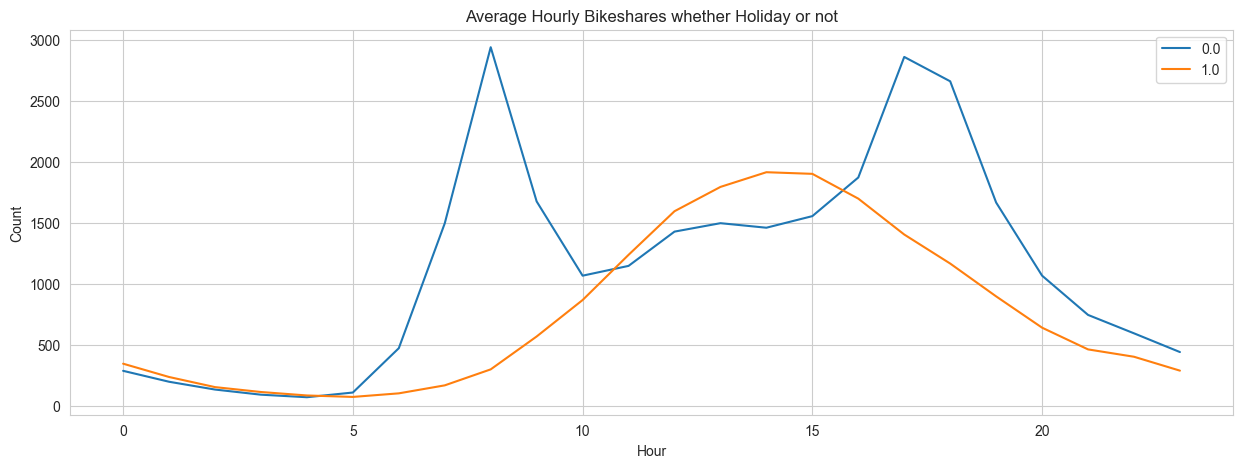

In [41]:
hour_holiday_cnt = df.groupby(["is_holiday","hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for is_holiday in hour_holiday_cnt.index.levels[0]:
    plt.plot(hour_holiday_cnt[is_holiday].index, hour_holiday_cnt[is_holiday], label=is_holiday)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Holiday or not')
plt.show()

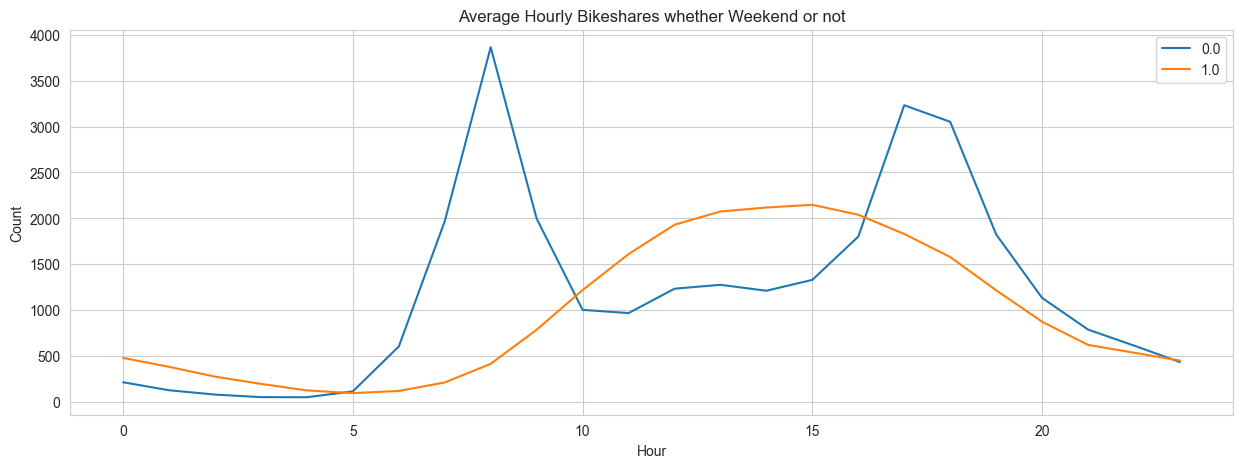

In [42]:
hour_weekend_cnt = df.groupby(["is_weekend","hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for is_weekend in hour_weekend_cnt.index.levels[0]:
    plt.plot(hour_weekend_cnt[is_weekend].index, hour_weekend_cnt[is_weekend], label=is_weekend)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Weekend or not')
plt.show()

It is observed that more bicycles are used in hot weather. 

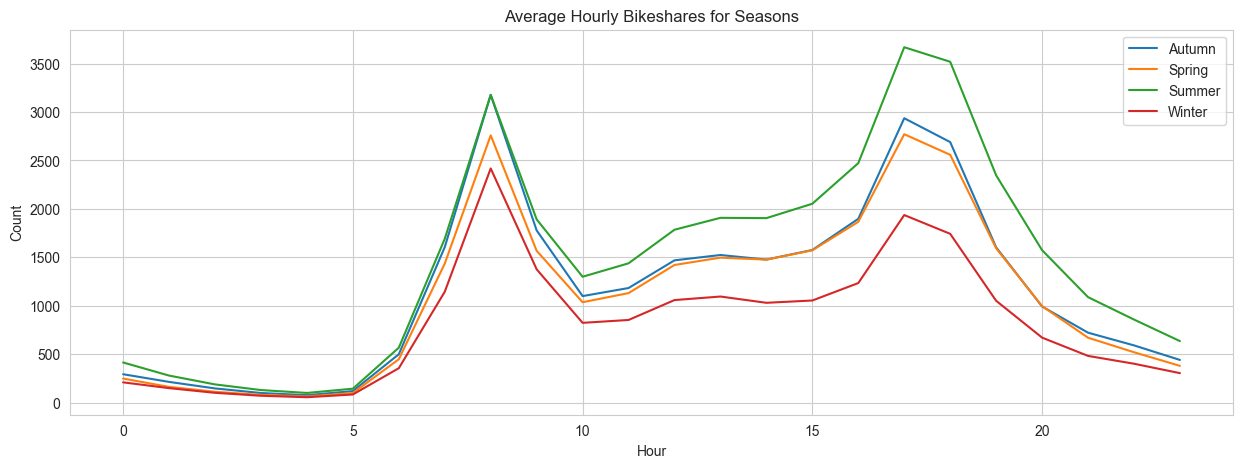

In [44]:
season_hour_cnt = df.groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_hour_cnt.index.levels[0]:
    plt.plot(season_hour_cnt[season].index, season_hour_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Seasons')
plt.show()

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

Bicycle usage appears to be higher on weekdays and lower on weekends. 

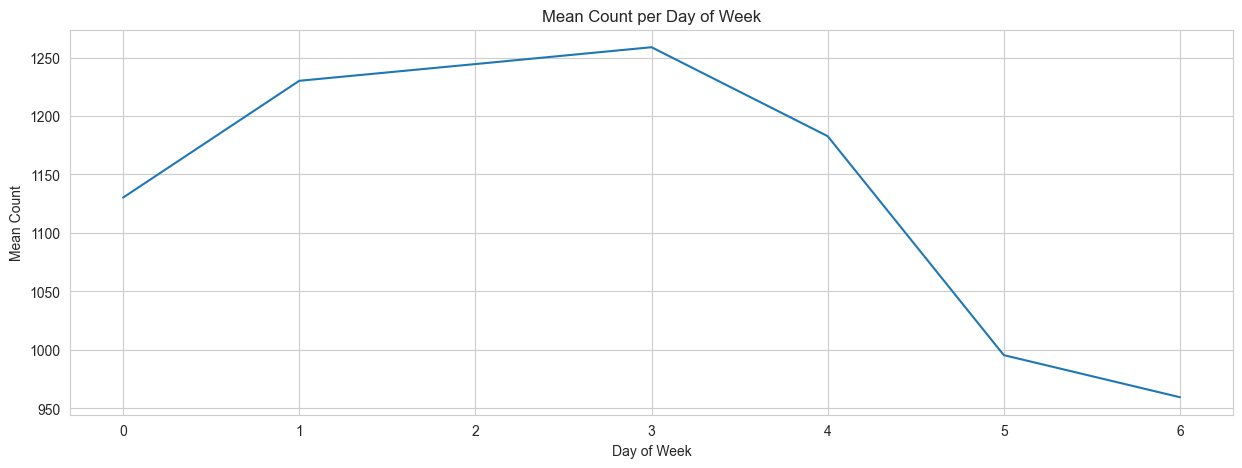

In [47]:
weekday_cnt = df.groupby("dayofweek")["cnt"].mean()

plt.figure(figsize=(15, 5))
sns.lineplot(x=weekday_cnt.index, y=weekday_cnt.values)

plt.xlabel("Day of Week")
plt.ylabel("Mean Count")
plt.title("Mean Count per Day of Week")

plt.show()

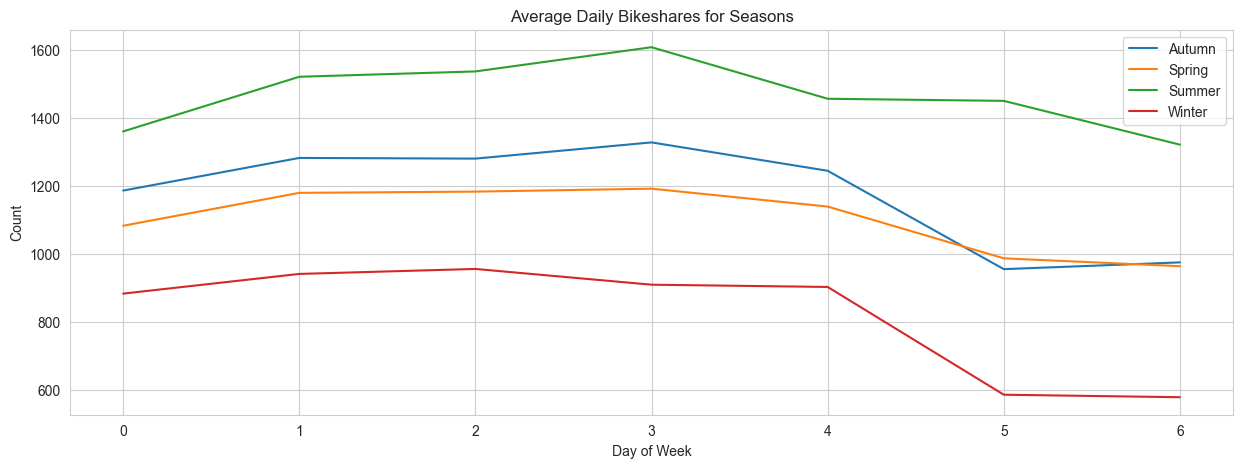

In [48]:
season_dayofweek_cnt = df.groupby(["season_name", "dayofweek"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_dayofweek_cnt.index.levels[0]:
    plt.plot(season_dayofweek_cnt[season].index, season_dayofweek_cnt[season],label=season)

plt.legend()
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Daily Bikeshares for Seasons')
plt.show()

## <font color='skyblue'> <b>Dropping Unnecessary Columns</b><font color='black'>  

- Check correlations via heatmap
- Check weather_code
- Think about time-based features and decide dropping which is unnecessary for the model

"weather_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 

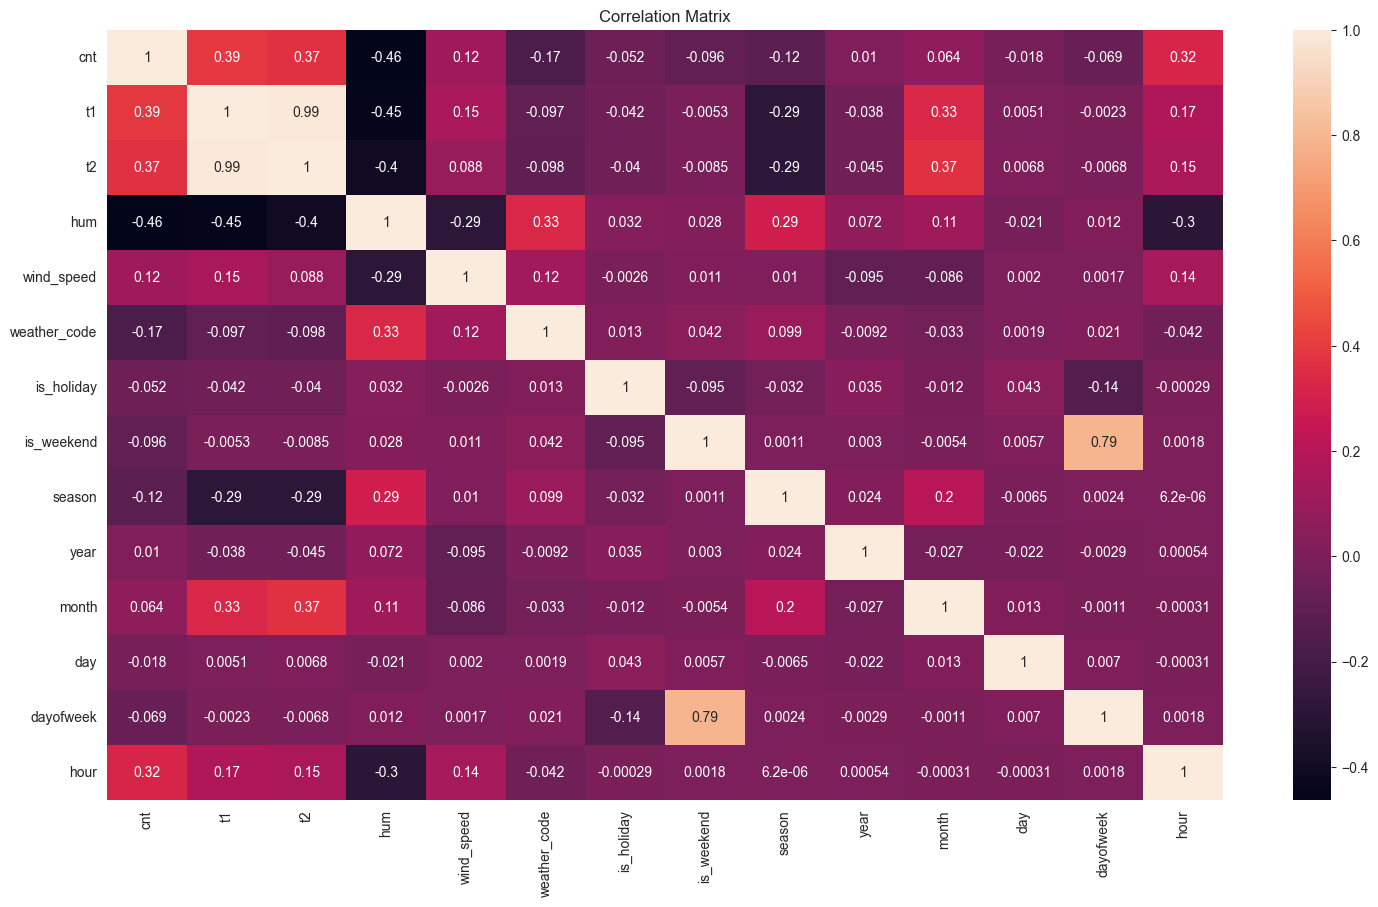

In [51]:
numerical_df = df.select_dtypes(include=[np.number])

# Creating the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

There is a very high correlation between `t1` and `t2`. One represents the actual temperature, while the other represents the perceived temperature. 

In [53]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,dayofweek,hour,date,season_name
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,2015,1,4,6,0,2015-01-04,Winter
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,2015,1,4,6,1,2015-01-04,Winter
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,2015,1,4,6,2,2015-01-04,Winter
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,2015,1,4,6,3,2015-01-04,Winter
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,2015,1,4,6,4,2015-01-04,Winter


We group the `weather code` to better understand it. If the weather code is low, the weather is good; if it is high, the weather is bad.

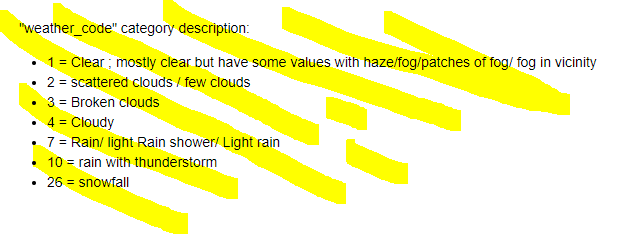

weather_code
1.000    1162.089
2.000    1496.177
3.000    1195.124
4.000     635.231
7.000     712.966
10.000    583.429
26.000    250.850
Name: cnt, dtype: float64


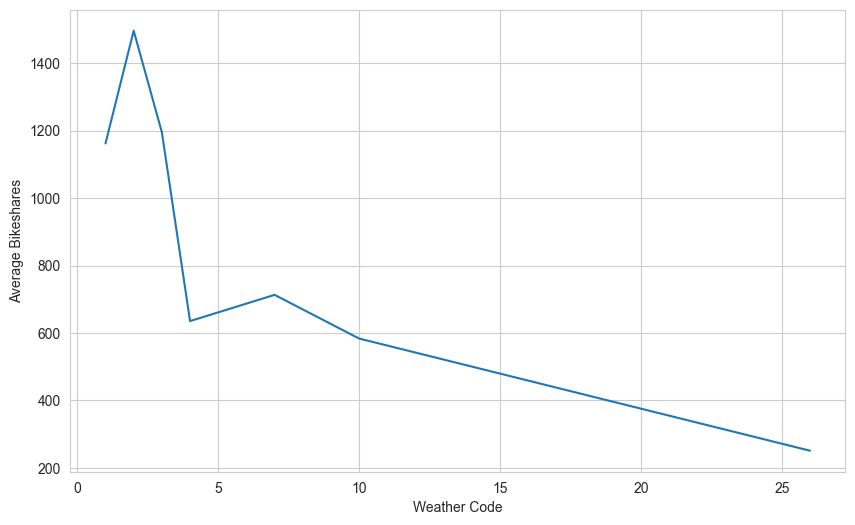

In [56]:
plt.figure(figsize=(10,6))
ax = df.groupby('weather_code')['cnt'].mean().plot()
ax.set(xlabel='Weather Code')
ax.set(ylabel='Average Bikeshares')
print(df.groupby('weather_code')['cnt'].mean())

In time series data, irrelevant columns are generally dropped.

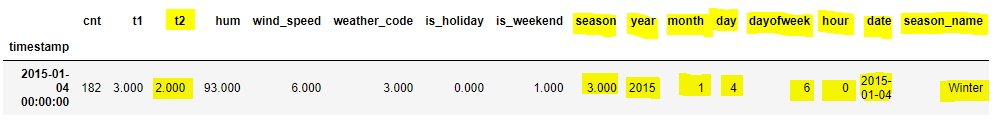

In [59]:
df_raw = df.drop(["t2", "date", "year", "season_name", "season", "month", "dayofweek", "day", "hour"], axis=1)

In [60]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   hum           17414 non-null  float64
 3   wind_speed    17414 non-null  float64
 4   weather_code  17414 non-null  float64
 5   is_holiday    17414 non-null  float64
 6   is_weekend    17414 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.1 MB


# <font color='steelblue'> <b>Data Pre-Processing</b><font color='black'>  

## <font color='skyblue'> <b>Train | Test Split</b><font color='black'>  

Appropriately split the data for optimum training.

We apply `get_dummies` to the `weather code`.

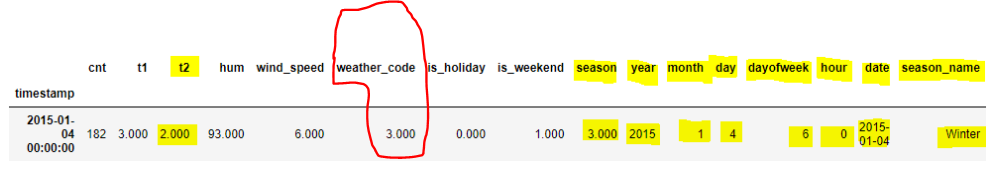

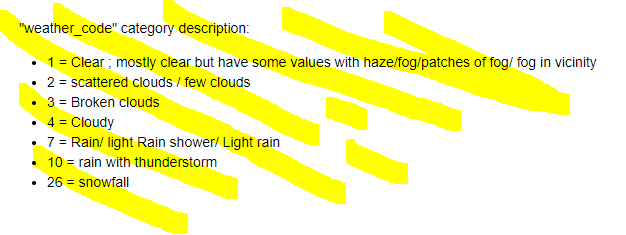

In [66]:
weather_dummy = pd.get_dummies(df_raw['weather_code'].astype("str"), prefix="w_code", drop_first=True)
df_dum = pd.concat([df_raw, weather_dummy],axis=1).drop(["weather_code"],axis=1)
df_dum.head()

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,93.000,6.000,0.000,1.000,False,False,False,True,False,False
2015-01-04 01:00:00,138,3.000,93.000,5.000,0.000,1.000,False,False,False,False,False,False
2015-01-04 02:00:00,134,2.500,96.500,0.000,0.000,1.000,False,False,False,False,False,False
2015-01-04 03:00:00,72,2.000,100.000,0.000,0.000,1.000,False,False,False,False,False,False
2015-01-04 04:00:00,47,2.000,93.000,6.500,0.000,1.000,False,False,False,False,False,False


Thus, 7 features have transformed into 12 features. 

In [68]:
df_dum.shape

(17414, 12)

In [69]:
train_size = int(len(df_dum) * 0.9)
test_size = len(df_dum) - train_size

train, test = df_dum.iloc[0:train_size], df_dum.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [70]:
train.shape

(15672, 12)

In [71]:
test.shape

(1742, 12)

## <font color='skyblue'> <b>Scaling</b><font color='black'>  

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1'/'t2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

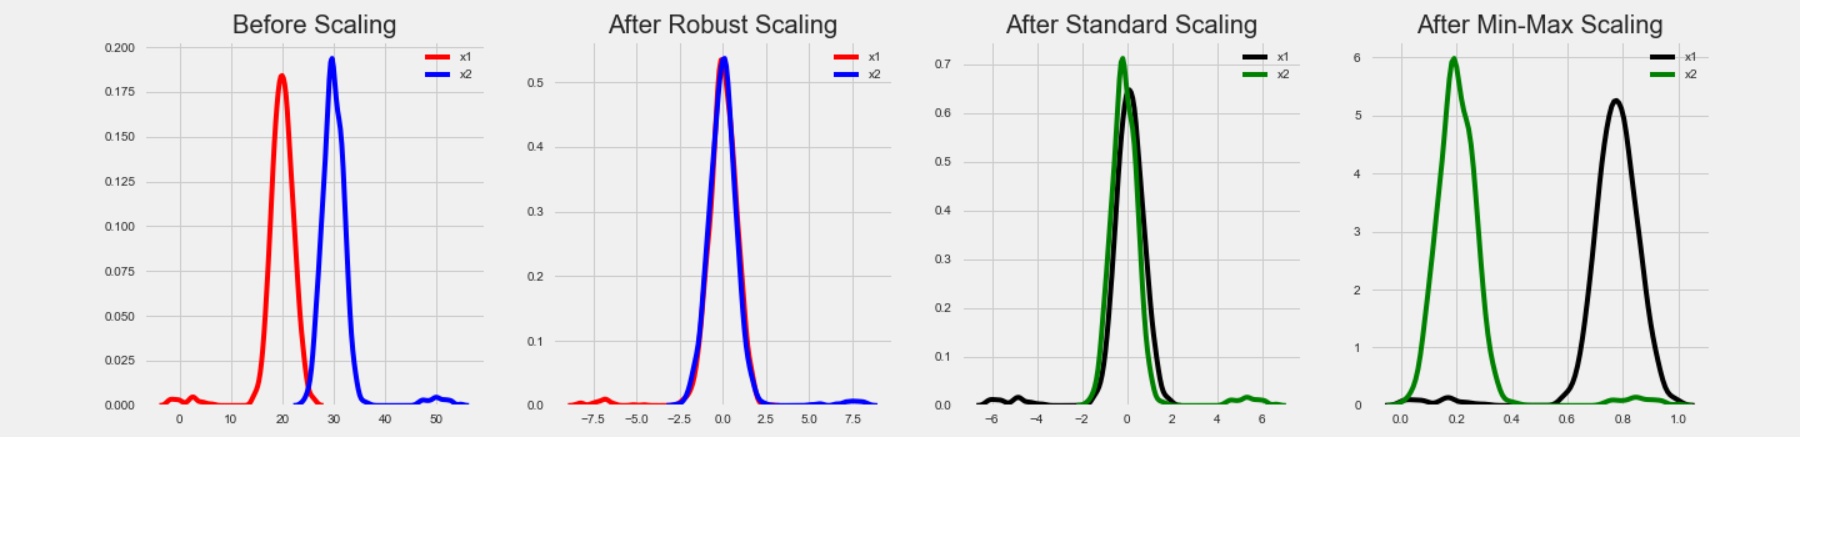

In [75]:
from sklearn.preprocessing import RobustScaler

Robust Scaling scales the data based on the median and percentiles. This reduces the impact of outliers and helps the LSTM model train more effectively.  

When there was only one feature, we applied MinMax scaling to the entire dataset. Then, we applied `fit_transform` to the training data while applying only `transform` to the test data.  

We do not include the dummy features in scaling since they are already between 0 and 1.  

In [77]:
df_dum.columns

Index(['cnt', 't1', 'hum', 'wind_speed', 'is_holiday', 'is_weekend',
       'w_code_10.0', 'w_code_2.0', 'w_code_26.0', 'w_code_3.0', 'w_code_4.0',
       'w_code_7.0'],
      dtype='object')

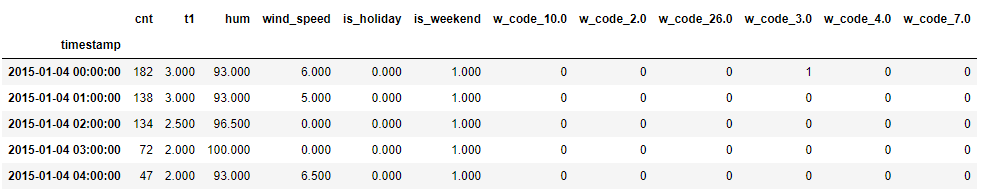

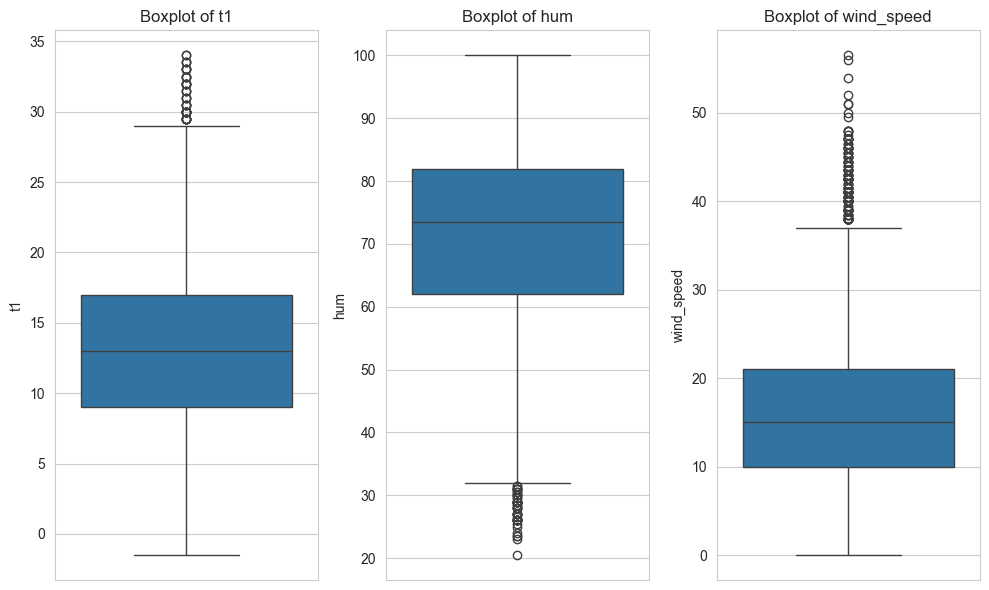

In [79]:
f_columns = ['t1', 'hum', 'wind_speed']
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st chart
sns.boxplot(y=train['t1'])
plt.title('Boxplot of t1')

plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd chart
sns.boxplot(y=train['hum'])
plt.title('Boxplot of hum')

plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd chart
sns.boxplot(y=train['wind_speed'])
plt.title('Boxplot of wind_speed')

plt.tight_layout()  # Adjusting the spacing between graphics
plt.show()

In our dataset, the target label will be `CNT`, which represents the count.  

Later, since we will only apply `INVERSE TRANSFORM` to the target column, we need to separate it here and avoid applying a separate scaling operation to it.  

For a single feature, the process was as follows:  

```python
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
```

In [81]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()        # Scale used for features
target_transformer = RobustScaler()   # Scale used for the target

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
# The expression train.loc[:, f_columns] selects all rows in the train dataset and the columns specified in the f_columns list.
train['cnt'] = target_transformer.fit_transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
# The expression test.loc[:, f_columns] selects all rows in the test dataset and the columns specified in the f_columns list.

test['cnt'] = target_transformer.transform(test[['cnt']])

## <font color='skyblue'> <b>Defining a Function for Creating Time Steps</b><font color='black'>  

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

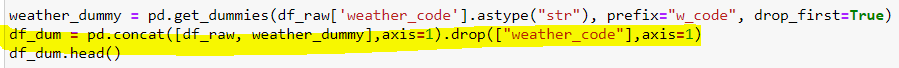

In [84]:
train

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,-0.465,-1.250,0.975,-0.818,0.000,1.000,False,False,False,True,False,False
2015-01-04 01:00:00,-0.495,-1.250,0.975,-0.909,0.000,1.000,False,False,False,False,False,False
2015-01-04 02:00:00,-0.498,-1.312,1.150,-1.364,0.000,1.000,False,False,False,False,False,False
2015-01-04 03:00:00,-0.541,-1.375,1.325,-1.364,0.000,1.000,False,False,False,False,False,False
2015-01-04 04:00:00,-0.558,-1.375,0.975,-0.773,0.000,1.000,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-23 03:00:00,-0.441,-0.625,0.825,-0.818,0.000,1.000,False,True,False,False,False,False
2016-10-23 04:00:00,-0.487,-0.625,0.975,-0.818,0.000,1.000,False,True,False,False,False,False
2016-10-23 05:00:00,-0.517,-0.625,0.675,-1.000,0.000,1.000,False,False,False,True,False,False


In [85]:
def create_dataset(X, y, time_steps=1):  # X and y train data will be passed here.
   
    Xs, ys = [], []                              # Creating two empty lists to store X and y train data.
    for i in range(len(X) - time_steps):         # Looping until the length of X.
        v = X.iloc[i:(i + time_steps)].values    # In each iteration, take the train data from index i to (i + time_steps) as values (DataFrame format).
        Xs.append(v)                             # Append this value to the first list in batches, e.g., 0-24, 1-25, etc.
        ys.append(y.iloc[i + time_steps])        # Assign the (i + time_steps)th data point to y, e.g., if i is 0, then take index 24 for y.
    return np.array(Xs), np.array(ys)            # Convert them into NumPy arrays.


We have created `X_train` and `y_train` using the `create_dataset` function defined earlier. 

In [87]:
time_steps = 24  

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# reshape to [samples, time_steps, n_features]

(15648, 24, 12) (15648,)
(1718, 24, 12) (1718,)


In [88]:
X_train

array([[[-0.46487603305785125, -1.25, 0.975, ..., True, False, False],
        [-0.4951790633608815, -1.25, 0.975, ..., False, False, False],
        [-0.49793388429752067, -1.3125, 1.15, ..., False, False, False],
        ...,
        [-0.4380165289256198, -1.25, 0.975, ..., False, True, False],
        [-0.46763085399449034, -1.25, 0.975, ..., False, True, False],
        [-0.4820936639118457, -1.125, 0.675, ..., False, True, False]],

       [[-0.4951790633608815, -1.25, 0.975, ..., False, False, False],
        [-0.49793388429752067, -1.3125, 1.15, ..., False, False, False],
        [-0.540633608815427, -1.375, 1.325, ..., False, False, False],
        ...,
        [-0.46763085399449034, -1.25, 0.975, ..., False, True, False],
        [-0.4820936639118457, -1.125, 0.675, ..., False, True, False],
        [-0.5330578512396694, -1.125, 0.975, ..., False, True, False]],

       [[-0.49793388429752067, -1.3125, 1.15, ..., False, False, False],
        [-0.540633608815427, -1.375, 1.325

In [89]:
X_train[0]

array([[-0.46487603305785125, -1.25, 0.975, -0.8181818181818182, 0.0,
        1.0, False, False, False, True, False, False],
       [-0.4951790633608815, -1.25, 0.975, -0.9090909090909091, 0.0, 1.0,
        False, False, False, False, False, False],
       [-0.49793388429752067, -1.3125, 1.15, -1.3636363636363635, 0.0,
        1.0, False, False, False, False, False, False],
       [-0.540633608815427, -1.375, 1.325, -1.3636363636363635, 0.0, 1.0,
        False, False, False, False, False, False],
       [-0.5578512396694215, -1.375, 0.975, -0.7727272727272727, 0.0,
        1.0, False, False, False, False, False, False],
       [-0.5585399449035813, -1.375, 0.975, -1.0, 0.0, 1.0, False, False,
        False, False, False, False],
       [-0.5550964187327824, -1.5, 1.325, -0.7272727272727273, 0.0, 1.0,
        False, False, False, False, True, False],
       [-0.5385674931129476, -1.5, 1.325, -0.7272727272727273, 0.0, 1.0,
        False, False, False, False, True, False],
       [-0.5, -

In [90]:
y_train[0]

-0.5330578512396694

In [91]:
X_test

array([[[-0.37052341597796146, -0.625, 0.675, ..., False, False, False],
        [-0.07782369146005509, -0.4375, 0.275, ..., False, False, False],
        [0.34573002754820936, -0.3125, 0.025, ..., True, False, False],
        ...,
        [-0.5034435261707989, -0.375, 0.275, ..., False, False, False],
        [-0.18732782369146006, -0.3125, 0.3, ..., False, False, True],
        [0.768595041322314, -0.25, 0.3, ..., False, False, False]],

       [[-0.07782369146005509, -0.4375, 0.275, ..., False, False, False],
        [0.34573002754820936, -0.3125, 0.025, ..., True, False, False],
        [0.7183195592286501, -0.125, -0.2, ..., False, False, False],
        ...,
        [-0.18732782369146006, -0.3125, 0.3, ..., False, False, True],
        [0.768595041322314, -0.25, 0.3, ..., False, False, False],
        [2.1542699724517904, -0.25, 0.175, ..., False, False, False]],

       [[0.34573002754820936, -0.3125, 0.025, ..., True, False, False],
        [0.7183195592286501, -0.125, -0.2, ..

In [92]:
y_test[0]

2.1542699724517904

# <font color='steelblue'> <b>Model Building with GRU</b><font color='black'>  

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout,GRU
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
X_train.shape

(15648, 24, 12)

Instead of increasing the model's width, it is more beneficial to increase its depth.  

---

In the expression `X_train.shape[2]`, the number `2` represents the third dimension of the `X_train` dataset.  

In machine learning problems, datasets are typically 2D (e.g., tabular data) or 3D (e.g., image or time series data). In 3D datasets, data is represented as a sequence, and the third dimension represents different features of the data points.  

For example, consider a time series dataset. Each data point consists of values measured at different time steps. In this case, the shape of `X_train` could be (100, 10, 3), where:  
- `100` represents the number of data points,  
- `10` represents the number of time steps per data point,  
- `3` represents the number of features measured at each time step.  

Thus, `X_train.shape[2]` returns the size of the third dimension, indicating the number of features present in each data point.

In [97]:
y_train.shape

(15648,)

In [98]:
n_features = X_train.shape[2]

In [99]:
print(n_features)

12


In [100]:
model = Sequential()
model.add(Bidirectional(GRU(units=128, input_shape=(time_steps, n_features))))  # Expects a 24x12 input shape
# The role of BIDIRECTIONAL here: (sum of forward and backward passes)
# First, it processes the 24-length sequences from 1 to 24, then from 24 to 1 in reverse order.
# The results from both directions are combined and passed to the next layer.

# model.add(Dropout(rate=0.2))

model.add(Dense(units=1))  # Output layer with a single neuron

model.compile(optimizer='adam', loss='mse')  # Compiling the model with Adam optimizer and Mean Squared Error loss

In [101]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

The parameter `restore_best_weights=True` ensures that when early stopping is used, the best-performing model weights are restored.  

Early stopping is a technique used to control the training process. As training progresses, the training loss usually decreases, while the validation loss may start increasing, indicating potential overfitting and reduced generalization ability.  

Early stopping stops training when the validation loss does not decrease for a specified patience period. This helps prevent overfitting and ensures better generalization.  

By setting `restore_best_weights=True`, the model retains the best weights recorded during training instead of the final weights, ensuring optimal performance at the point of early stopping.  

This approach is commonly used to prevent overfitting and improve generalization. 

In [103]:
# When we set patience=5, it means that the best value is the one recorded 5 steps before the last one.
# With restore_best_weights, we ensure that the model restores the weights from the best-performing epoch.
# If we don't specify this, the model will take the weights from the last epoch by default.
# However, the best value might have occurred earlier, and the last value could be worse than the best one.

In [104]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In RNNs, using `validation_split` does not disrupt the order when splitting the dataset randomly, making it a suitable approach for time series data.

In [106]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [107]:
X_test = X_train.astype('float32')
y_test = y_train.astype('float32')

In [108]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.1732 - val_loss: 0.0639
Epoch 2/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0464 - val_loss: 0.0354
Epoch 3/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0249 - val_loss: 0.0281
Epoch 4/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0193 - val_loss: 0.0253
Epoch 5/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0194 - val_loss: 0.0231
Epoch 6/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0178 - val_loss: 0.0200
Epoch 7/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0150 - val_loss: 0.0181
Epoch 8/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0133 - val_loss: 0.0196
Epoch 9/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0112 - val_loss: 0.0222
Epoch 10/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0161 - val_loss: 0.0185
Epoch 11/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0131 - val_loss: 0.0179
Epoch 12/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 

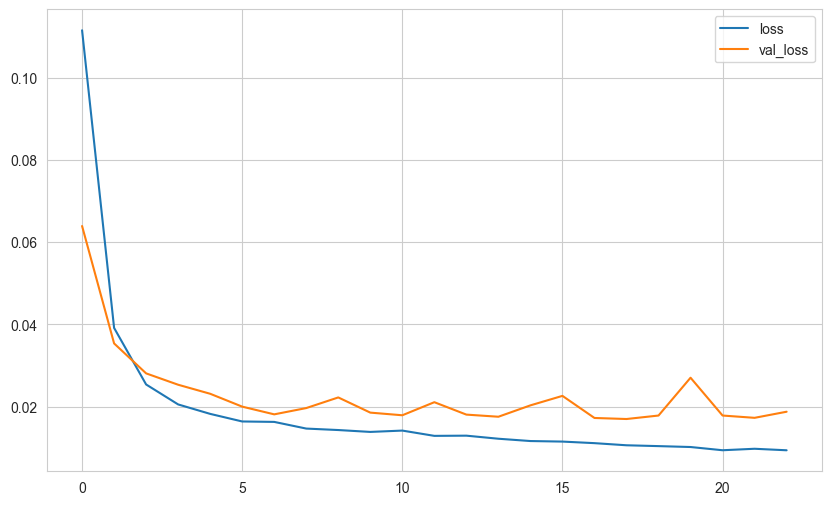

In [109]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

# <font color='steelblue'> <b>Evaluate on Test Data</b><font color='black'>  

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

Check scores with both scaled results and inversed results.

Plot predictions and actula values together.

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [113]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [114]:
X_test.shape

(15648, 24, 12)

In [115]:
y_pred = model.predict(X_test)

489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [116]:
eval_metrics(y_test, y_pred)

r2_score: 0.9803746938705444 
mae: 0.06669420003890991 
mse: 0.01125185564160347 
rmse: 0.10607476439570097


## <font color='skyblue'> <b>Inverse Transformation and Compare</b><font color='black'>  

In [118]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   # We turn it into a single line with reshape.
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))     # There will be as many columns as there are columns.
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [119]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
#pred_test.index = test_index

This code is used to organize the results of predictions made on test data. Here is a step-by-step explanation of the code:  

1. The first line assigns the indices of the test dataframe after `time_steps` time steps to the variable `test_index`. This helps define the time range for making predictions on test data.  

2. The second line converts the `y_test_inv` and `y_pred_inv` arrays into a dataframe. `y_test_inv` represents the actual test data (after inverse transformation), and `y_pred_inv` represents the model's predictions (after inverse transformation).  

3. The third line uses the `pd.concat` function to merge `y_test_inv` and `y_pred_inv` into a single dataframe, allowing the predictions to be combined with the actual test data.  

4. The fourth line assigns the column names as `test` and `prediction`. As a result, a new dataframe named `pred_test` is created.  

5. The fifth line updates the index of the `pred_test` dataframe with `test_index`, ensuring the data is properly aligned.  

In conclusion, the `pred_test` dataframe contains the actual test values and the corresponding predictions, indexed appropriately. This enables direct comparison and evaluation of the predictions against the actual test data.  

In [121]:
pred_test

,test,prediction
0,83.000,85.169
1,67.000,15.569
2,32.000,34.477
3,22.000,0.518
4,38.000,-6.844
...,...,...
15643,217.000,250.355
15644,150.000,96.922
15645,107.000,58.933
15646,107.000,47.925


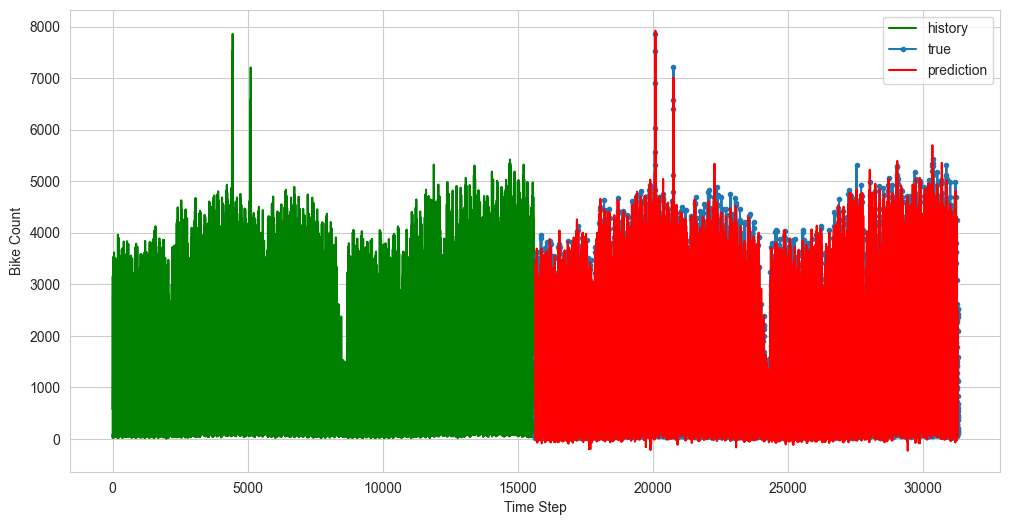

In [122]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

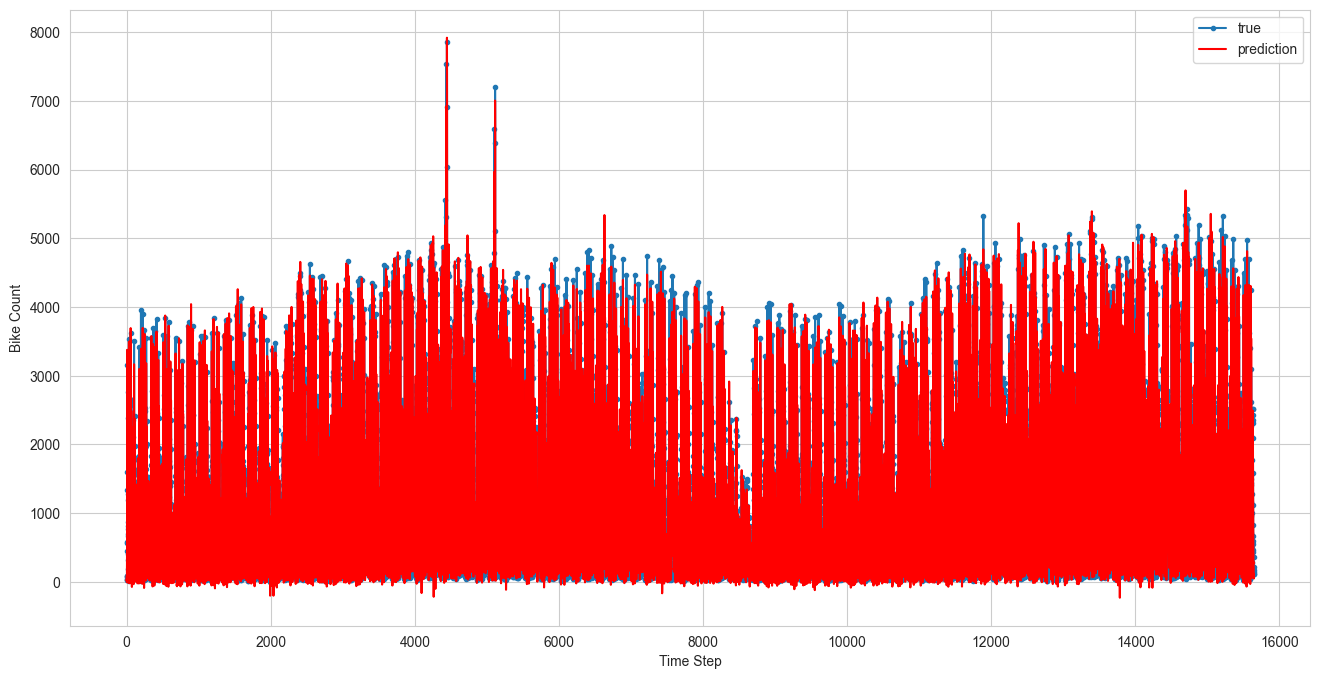

In [123]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

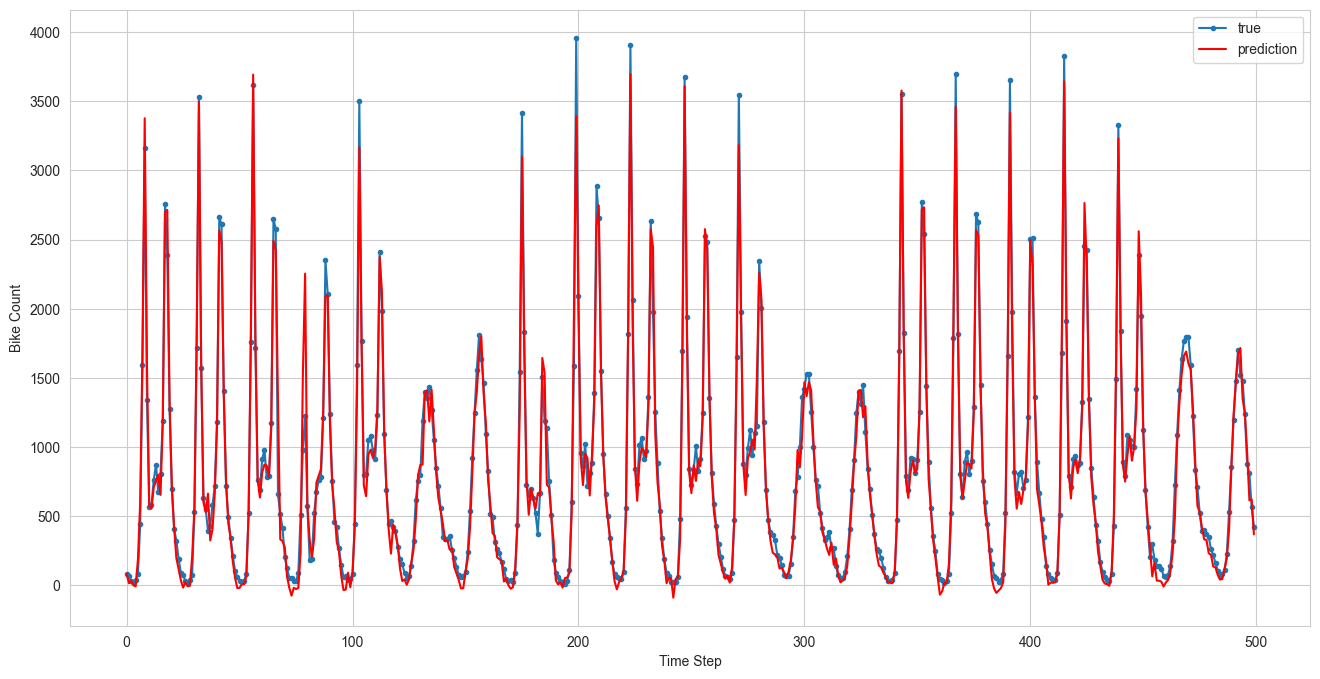

In [124]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten()[0:500], marker='.', label="true")
plt.plot(y_pred_inv.flatten()[0:500], 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

# <font color='steelblue'> <b>Retrain and Forecasting</b><font color='black'>  

## <font color='skyblue'> <b>Scaling Full Data</b><font color='black'>  

Let's devide dataset as "full" and "val". We can think about this "val" data as the weather forecast of next days.

In [128]:
val_size = 24
val = df_dum.iloc[-val_size:]
full = df_dum.iloc[:-val_size]
print(len(full), len(val))

17390 24


In [129]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()
target_transformer = RobustScaler()

full.loc[:, f_columns] = f_transformer.fit_transform(full[f_columns].to_numpy())
full['cnt'] = target_transformer.fit_transform(full[['cnt']])

val.loc[:, f_columns] = f_transformer.transform(val[f_columns])
val['cnt'] = target_transformer.transform(val[['cnt']])

In [130]:
full

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,-0.468,-1.188,0.925,-0.857,0.000,1.000,False,False,False,True,False,False
2015-01-04 01:00:00,-0.499,-1.188,0.925,-0.952,0.000,1.000,False,False,False,False,False,False
2015-01-04 02:00:00,-0.501,-1.250,1.100,-1.429,0.000,1.000,False,False,False,False,False,False
2015-01-04 03:00:00,-0.545,-1.312,1.275,-1.429,0.000,1.000,False,False,False,False,False,False
2015-01-04 04:00:00,-0.563,-1.312,0.925,-0.810,0.000,1.000,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-02 19:00:00,-0.290,-1.188,0.325,-0.381,1.000,0.000,False,False,False,False,False,False
2017-01-02 20:00:00,-0.360,-1.188,0.025,-0.190,1.000,0.000,False,False,False,False,False,False
2017-01-02 21:00:00,-0.431,-1.250,0.175,-0.381,1.000,0.000,False,False,False,False,False,False


## <font color='skyblue'> <b>reshape to [samples, time_steps, n_features]</b><font color='black'>  

In [132]:
X, y = create_dataset(full, full.cnt, time_steps)

print(X.shape, y.shape)

(17366, 24, 12) (17366,)


## <font color='skyblue'> <b>Create Final Model with Full Data </b><font color='black'>  

In [134]:
X = X.astype('float32')
y = y.astype('float32')

In [135]:
model = Sequential()

model.add(Bidirectional(GRU(units=128, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [136]:
model.fit(X, y, 
          epochs=20, 
          batch_size=32        
         )

Epoch 1/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.1758
Epoch 2/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0315
Epoch 3/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0211
Epoch 4/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0197
Epoch 5/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0152
Epoch 6/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0149
Epoch 7/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0139
Epoch 8/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0139
Epoch 9/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0123
Epoch 10/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0134
Epoch 11/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0132
Epoch 12/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0116
Epoch 13/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0119
Epoch 14/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0118
Epoch 15/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 6

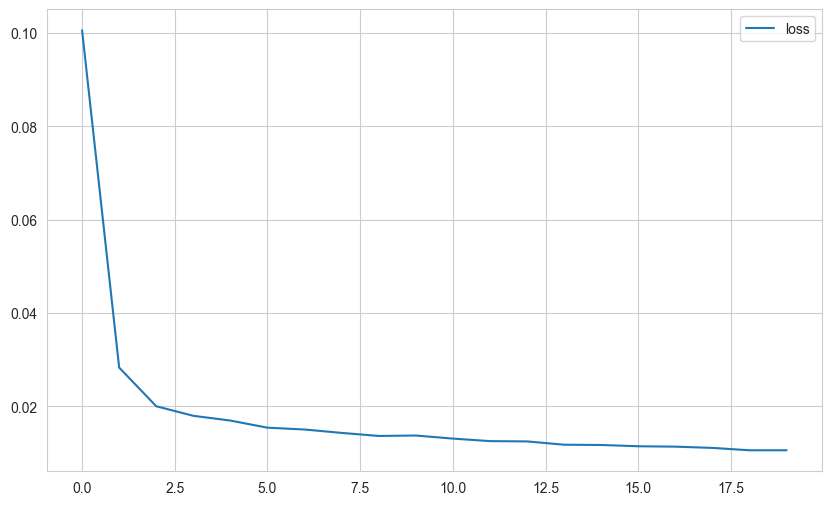

In [137]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

## <font color='skyblue'> <b>Forecasting</b><font color='black'>  

In [139]:
df_fake = val.iloc[:,1:]
df_fake

,t1,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,
2017-01-03 00:00:00,-1.438,0.775,-0.381,0.000,0.000,False,False,False,False,False,False
2017-01-03 01:00:00,-1.438,0.625,-0.476,0.000,0.000,False,False,False,False,False,False
2017-01-03 02:00:00,-1.500,0.775,-0.381,0.000,0.000,False,False,False,False,False,False
2017-01-03 03:00:00,-1.562,0.925,-0.190,0.000,0.000,False,False,False,False,False,False
2017-01-03 04:00:00,-1.562,0.925,-0.095,0.000,0.000,False,False,False,False,False,False
2017-01-03 05:00:00,-1.500,0.775,-0.095,0.000,0.000,False,False,False,True,False,False
2017-01-03 06:00:00,-1.438,0.625,0.286,0.000,0.000,False,False,False,False,False,False
2017-01-03 07:00:00,-1.438,0.625,0.381,0.000,0.000,False,False,False,False,False,False
2017-01-03 08:00:00,-1.438,0.625,0.333,0.000,0.000,False,False,False,True,False,False


In [140]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([-5.51553672e-01, -5.61440678e-01, -5.65677966e-01, -5.88983051e-01,
       -5.74858757e-01, -5.37429379e-01, -2.89548023e-01,  3.97598870e-01,
        1.45480226e+00,  3.62288136e-01, -1.29237288e-01, -1.46892655e-01,
       -1.34180791e-02,  2.40112994e-02, -5.57909605e-02,  7.06214689e-04,
        2.52118644e-01,  1.34039548e+00,  9.71751412e-01,  1.39830508e-01,
       -2.13983051e-01, -3.58050847e-01, -4.37853107e-01, -4.97881356e-01])

In [141]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
current_batch = current_batch.astype('float32')

features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [142]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.9732644189646461 
mae: 0.05321339938045074 
mse: 0.008757107953037113 
rmse: 0.09357942056369613


In [143]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[ 133.55121 ,   95.630554,   79.38623 ,  132.26135 ,   75.13403 ,
         137.63739 ,  352.6355  , 1304.7229  , 2918.006   , 1449.4281  ,
         611.25336 ,  631.9381  ,  865.5938  ,  834.7194  ,  841.6978  ,
         806.12634 , 1072.4093  , 2169.6477  , 2286.5513  , 1102.2869  ,
         550.67676 ,  342.38852 ,  213.64648 ,  102.72681 ]],
      dtype=float32)

In [144]:
forecast_index = pd.date_range(start = '2017-01-03 00:00:00', periods = periods, freq = 'H')

In [145]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

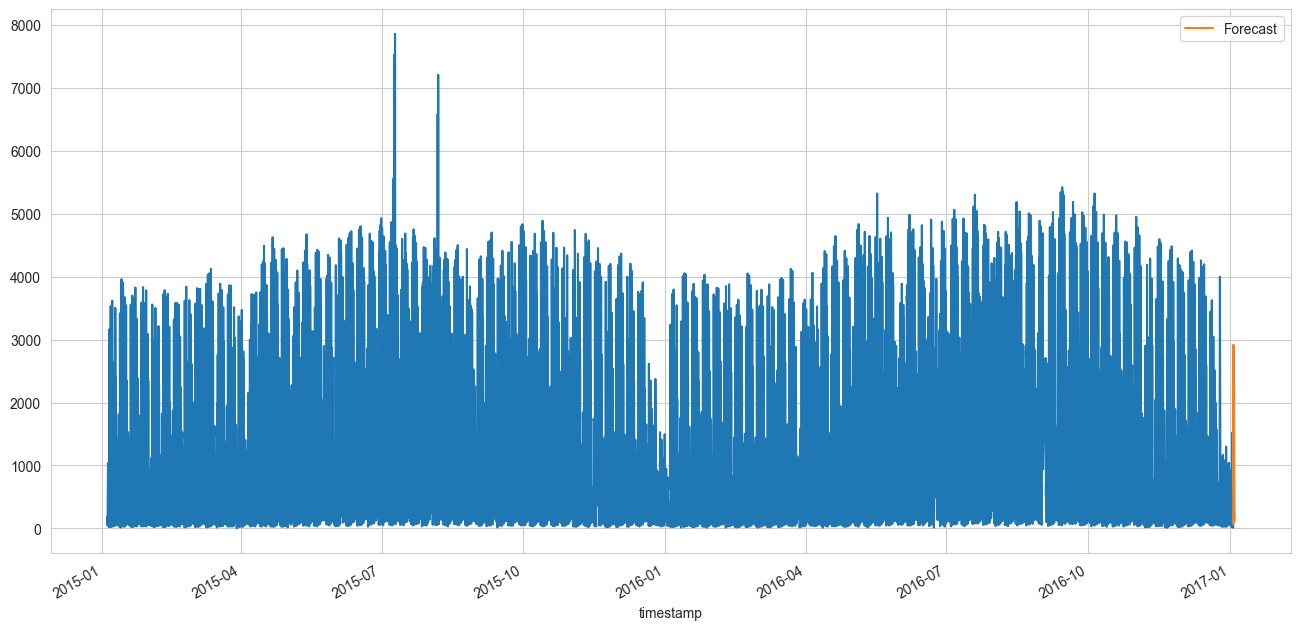

In [146]:
ax = df_raw["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(17167.0, 17169.958333333332)

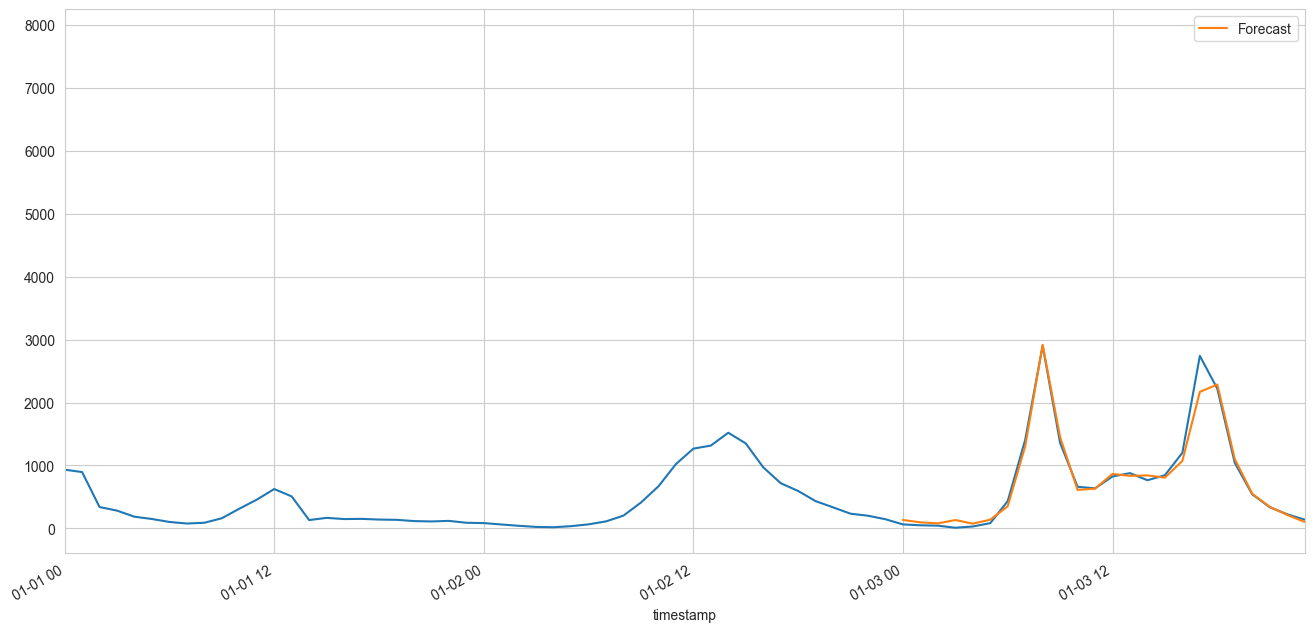

In [147]:
ax = df_raw["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-01 00:00:00', '2017-01-03 23:00:00')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

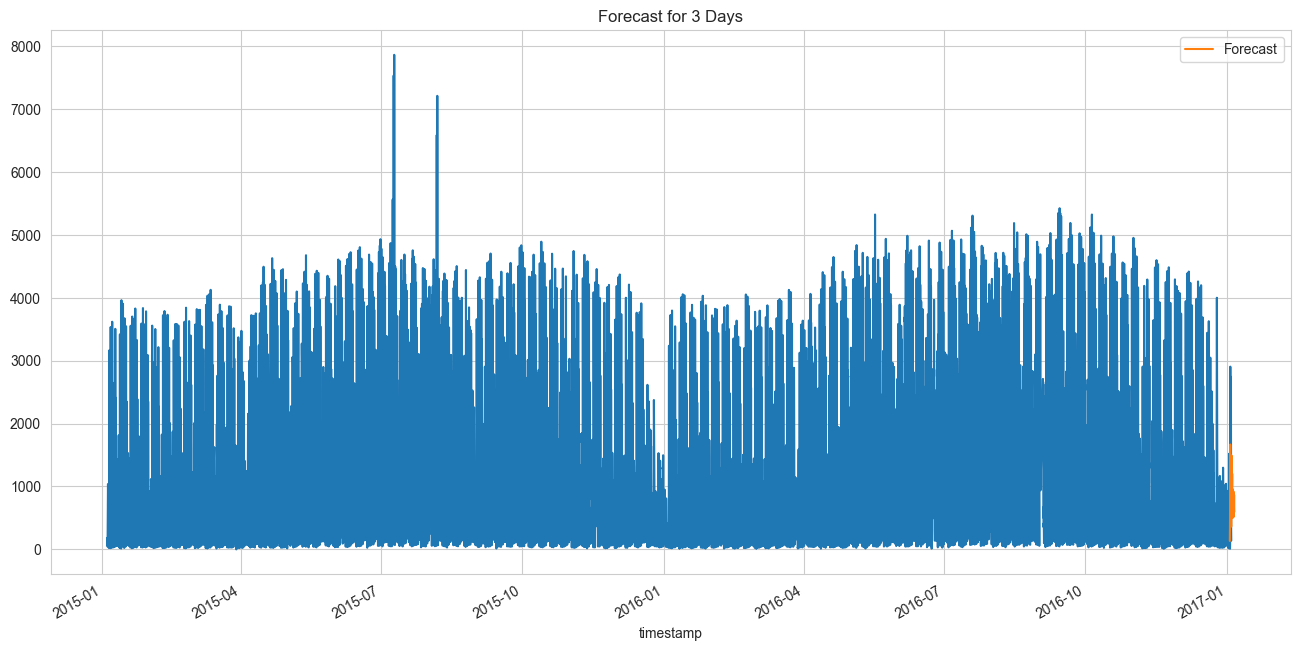

In [148]:
# Defining the forecast period of 72 hours (3 days)
periods = 72  # 3 days x 24 hours

# Extracting the last 24 hours and reshaping the data
first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
current_batch = current_batch.astype('float32')

# List to store 3-day forecast predictions
forecast = []

for i in range(periods):
    # Getting the prediction for the next time step
    current_pred = model.predict(current_batch)[0][0]
    
    # Appending the prediction to the forecast list
    forecast.append(current_pred)
    
    # Adding the predicted value to the sequence and removing the oldest value
    new = np.array([current_pred] + [0] * (full.shape[1] - 1)).reshape(1, 1, full.shape[1])  # First column is the prediction, the rest are zeros
    
    # Updating the current_batch
    current_batch = np.append(current_batch[:, 1:, :], new, axis=1)

# Converting predicted values back from normalized data (if a scaler was used)
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(-1, 1))

# Creating a time series index for the forecast
forecast_index = pd.date_range(start='2017-01-03 00:00:00', periods=periods, freq='H')

# Saving the forecast results in a DataFrame
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

# Plotting actual data and forecast on the same graph
ax = df_raw["cnt"].plot(figsize=(16, 8), title='Forecast for 3 Days')
forecast_df.plot(ax=ax)

plt.show()

(17167.0, 17172.958333333332)

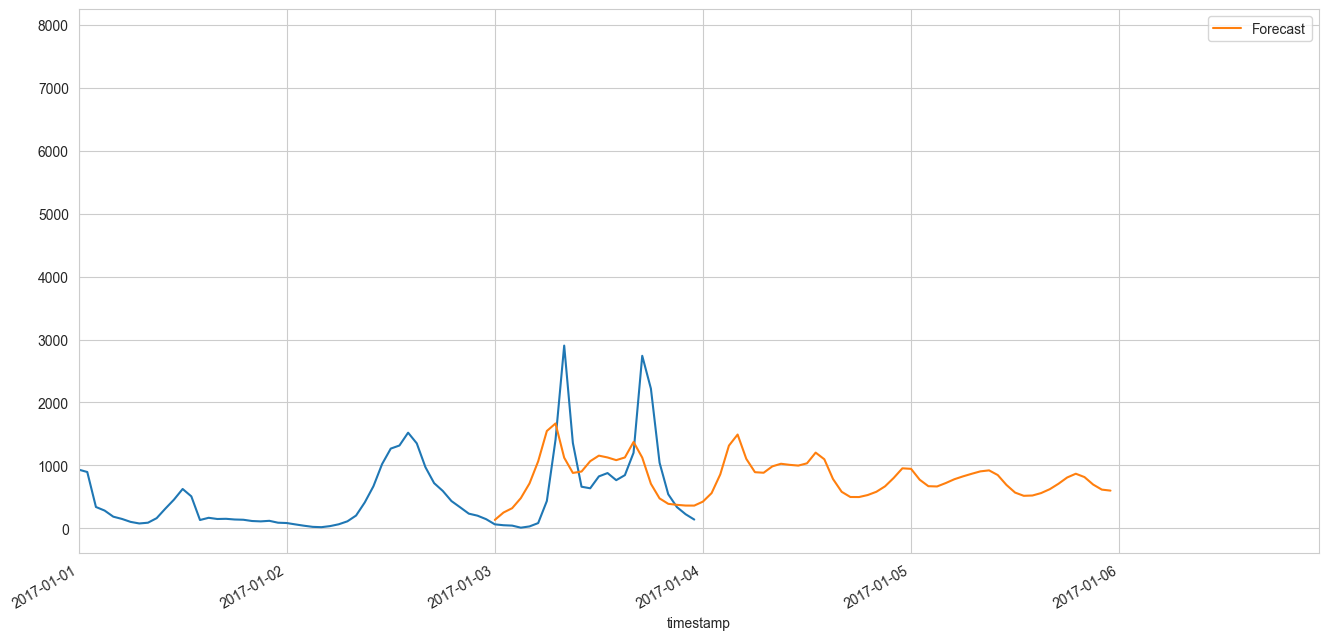

In [149]:
ax = df_raw["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-01 00:00:00', '2017-01-06 23:00:00')

<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>